## Showing the constituency parsing tree, the chunking result, and also the dependency parsing for the following sentence: “We saw a bird on the bridge.”

In [1]:
#defining text variable
text = "We saw a bird on the bridge."

In [2]:
#importing packages
import nltk
import stanza

In [3]:
corenlp_dir = './corenlp'
# Set the CORENLP_HOME environment variable to point to the installation location
import os
os.environ["CORENLP_HOME"] = corenlp_dir

In [4]:
# Import client module for CoreNLP
from stanza.server import CoreNLPClient

In [5]:
# Construct a CoreNLPClient with some annotators that will be needed, a memory allocation of 4GB, and port number 9001
client = CoreNLPClient(
    annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner', 'parse', 'depparse','natlog','openie'], 
    memory='4G', 
    endpoint='http://localhost:9001',
    be_quiet=True)
print(client)

# Start the background server
client.start()
import time; time.sleep(10)

2020-09-03 14:32:53 INFO: Writing properties to tmp file: corenlp_server-f194a69b0eba4287.props
2020-09-03 14:32:53 INFO: Starting server with command: java -Xmx4G -cp ./corenlp\* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-f194a69b0eba4287.props -annotators tokenize,ssplit,pos,lemma,ner,parse,depparse,natlog,openie -preload -outputFormat serialized


### Constituency parsing tree

In [6]:
# submit the request to the server for constituency parse
ann = client.annotate(text, annotators = 'tokenize, ssplit, pos, lemma, ner, parse')

# get the text sentence
sentence = ann.sentence[0]

#print constituency parsing tree
print('constituency parse of first sentence')
constituency_parse = sentence.parseTree
print(constituency_parse)

constituency parse of first sentence
child {
  child {
    child {
      child {
        value: "We"
      }
      value: "PRP"
      score: -3.4986112117767334
    }
    value: "NP"
    score: -4.360175132751465
  }
  child {
    child {
      child {
        value: "saw"
      }
      value: "VBD"
      score: -4.827887535095215
    }
    child {
      child {
        child {
          value: "a"
        }
        value: "DT"
        score: -1.5601271390914917
      }
      child {
        child {
          value: "bird"
        }
        value: "NN"
        score: -9.270315170288086
      }
      value: "NP"
      score: -12.773332595825195
    }
    child {
      child {
        child {
          value: "on"
        }
        value: "IN"
        score: -2.73764967918396
      }
      child {
        child {
          child {
            value: "the"
          }
          value: "DT"
          score: -0.5893369317054749
        }
        child {
          child {
            value: 

In [7]:
print(type(constituency_parse))

<class 'CoreNLP_pb2.ParseTree'>


Visualized constituency parse tree:

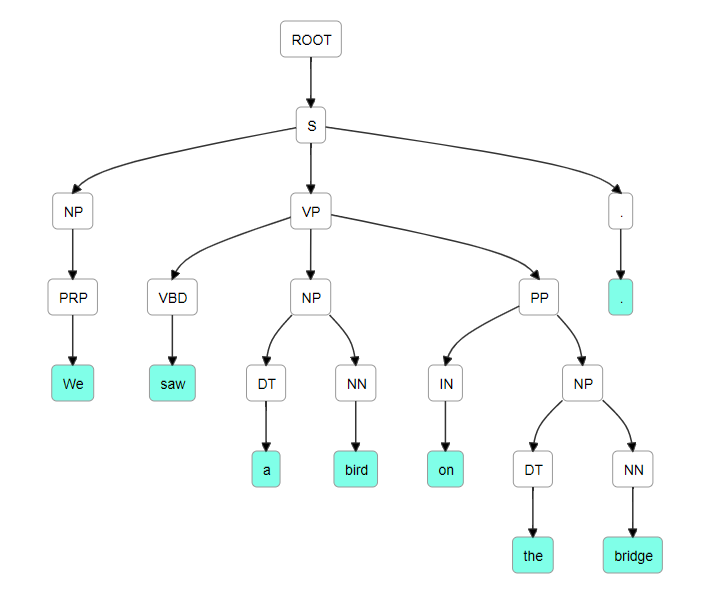

### Chunking Result

In [8]:
# Rely on the established corpus to train your own chunker. 
from nltk.corpus import conll2000

#defining chunker function
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [9]:
#running chunker on the text input to derive the chunking result

train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP','VP','PP']) ##chunk_types specify which categories you are interested in.
unigram_chunker = UnigramChunker(train_sents)
tagged_input=nltk.pos_tag(text.split())
print(unigram_chunker.parse(tagged_input))
unigram_chunker.parse(tagged_input).draw()

(S
  (NP We/PRP)
  (VP saw/VBD)
  (NP a/DT bird/NN)
  (PP on/IN)
  (NP the/DT bridge./NN))


Visualized chunking result:

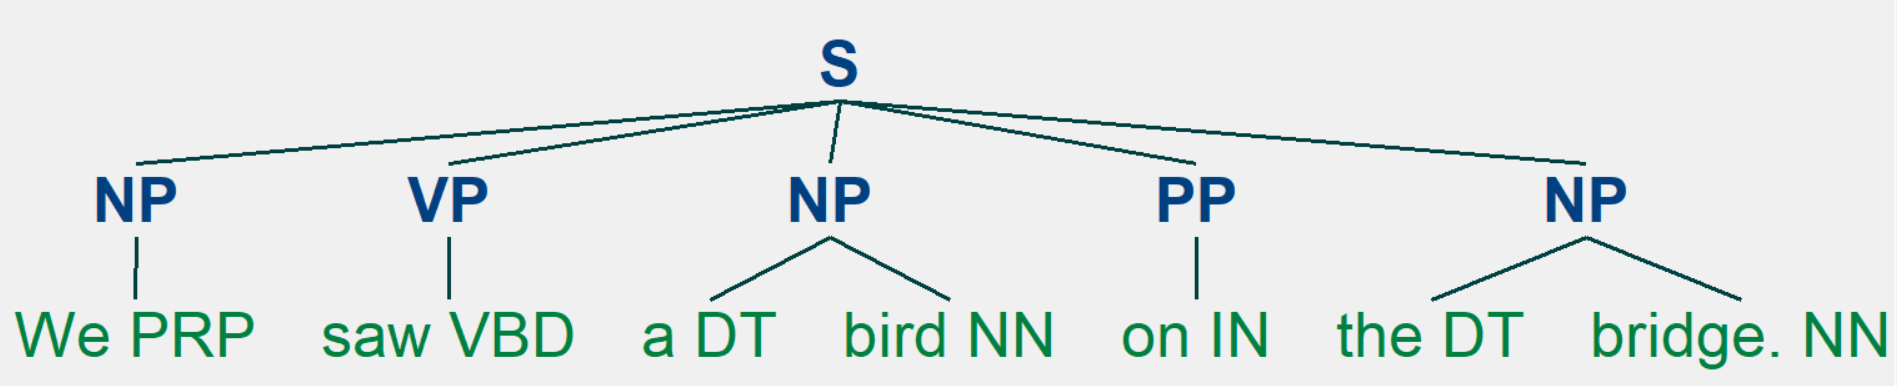

### Dependency Parse

In [10]:
# submit the request to the server for dependency parse
ann = client.annotate(text, annotators = 'tokenize, ssplit, pos, lemma, ner, depparse')

# get the first sentence
sentence = ann.sentence[0]

# get the dependency parse of the text sentence
print('---')
print('dependency parse of first sentence')
dependency_parse = sentence.basicDependencies
print(dependency_parse)

#get the tokens of the text sentence
    #note that 1 token is 1 node in the parse tree, nodes start at 1
print('---')
print('Tokens of first sentence')
for token in sentence.token :
    print(token)

---
dependency parse of first sentence
node {
  sentenceIndex: 0
  index: 1
}
node {
  sentenceIndex: 0
  index: 2
}
node {
  sentenceIndex: 0
  index: 3
}
node {
  sentenceIndex: 0
  index: 4
}
node {
  sentenceIndex: 0
  index: 5
}
node {
  sentenceIndex: 0
  index: 6
}
node {
  sentenceIndex: 0
  index: 7
}
node {
  sentenceIndex: 0
  index: 8
}
edge {
  source: 2
  target: 1
  dep: "nsubj"
  isExtra: false
  sourceCopy: 0
  targetCopy: 0
  language: UniversalEnglish
}
edge {
  source: 2
  target: 4
  dep: "obj"
  isExtra: false
  sourceCopy: 0
  targetCopy: 0
  language: UniversalEnglish
}
edge {
  source: 2
  target: 8
  dep: "punct"
  isExtra: false
  sourceCopy: 0
  targetCopy: 0
  language: UniversalEnglish
}
edge {
  source: 4
  target: 3
  dep: "det"
  isExtra: false
  sourceCopy: 0
  targetCopy: 0
  language: UniversalEnglish
}
edge {
  source: 4
  target: 7
  dep: "nmod"
  isExtra: false
  sourceCopy: 0
  targetCopy: 0
  language: UniversalEnglish
}
edge {
  source: 7
  tar

In [11]:
type(dependency_parse)

CoreNLP_pb2.DependencyGraph

In [12]:
#Code to get the DependencyGraph into a nice list of 'dependency, argument1, argument2'

#get a dictionary associating each token/node with its label
token_dict = {}
for i in range(0, len(sentence.token)) :
    token_dict[sentence.token[i].tokenEndIndex] = sentence.token[i].word

#get a list of the dependencies with the words they connect
list_dep=[]
for i in range(0, len(dependency_parse.edge)):

    source_node = dependency_parse.edge[i].source
    source_name = token_dict[source_node]

    target_node = dependency_parse.edge[i].target
    target_name = token_dict[target_node]

    dep = dependency_parse.edge[i].dep

    list_dep.append((dep, 
        str(source_node)+'-'+source_name, 
        str(target_node)+'-'+target_name))
print(list_dep)

[('nsubj', '2-saw', '1-We'), ('obj', '2-saw', '4-bird'), ('punct', '2-saw', '8-.'), ('det', '4-bird', '3-a'), ('nmod', '4-bird', '7-bridge'), ('case', '7-bridge', '5-on'), ('det', '7-bridge', '6-the')]


Visualized dependency parse tree:

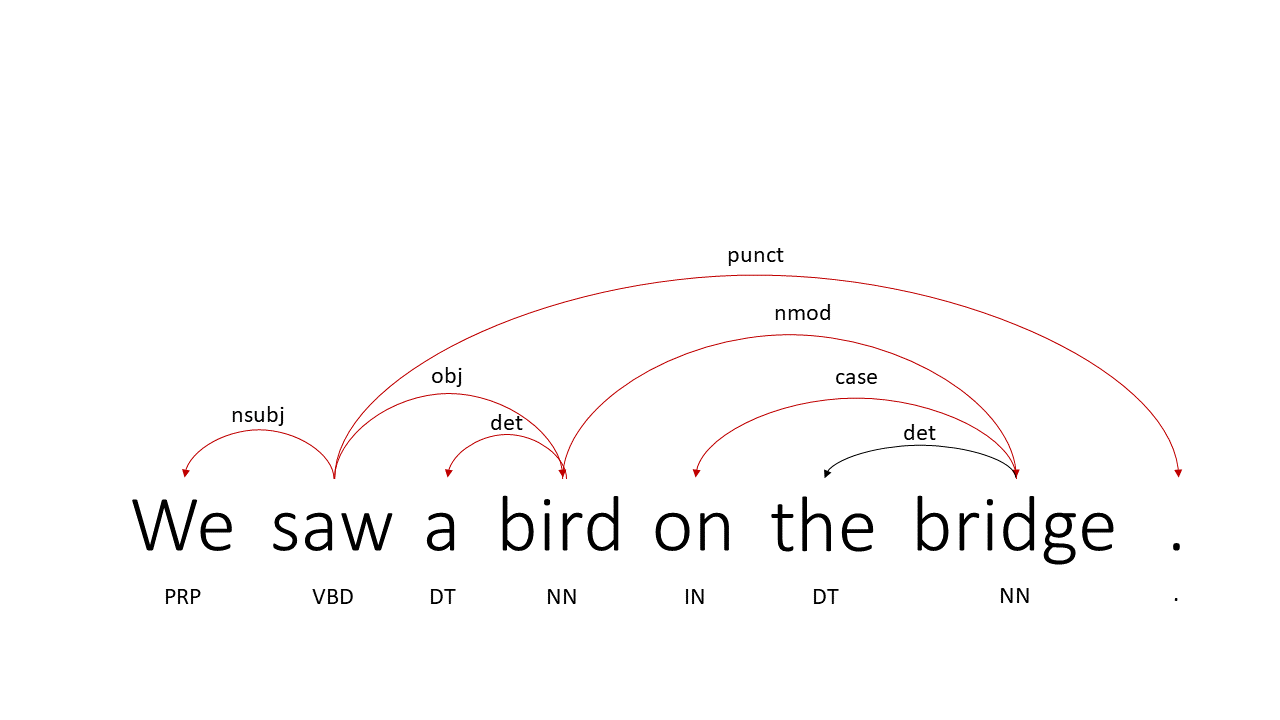

## Given the dataset “data.txt”, solving the following problems

In [13]:
#importing txt data
with open('data.txt', 'r', encoding='utf8') as r:
    corpus = r.read().replace('\n', ' ').replace('\r', '')

In [14]:
print(type(corpus))
corpus[:122]

<class 'str'>


'An interesting forum post on the Silk Road 2.0 forums (being set up as we speak) counting the arrests that happened so far'

### Find all relation triples that mention arrest.

In [15]:
#importing packages
from openie import StanfordOpenIE
import re

In [16]:
# Importing client module for StanfordOpenIE
with StanfordOpenIE() as client:
    triples_corpus = client.annotate(corpus) #extracting all relation triples from the corpus

Starting server with command: java -Xmx8G -cp C:\Users\Bryon Liew\stanfordnlp_resources\stanford-corenlp-full-2018-10-05/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-c54a0d407b414db1.props -preload openie


In [17]:
#creating an empty list to store relation triples that contain the string "arrest"
arrests_corpus = []

#looping over all relation triples to append those that contain "arrest" into a separate list 'arrests_corpus'
for triple in triples_corpus[:]:
    for key, value in triple.items():
        if re.search("(?i)arrest", value):
            arrests_corpus.append(triple)

In [18]:
print('Fround %s triples mentioning arrests in the corpus.' % len(arrests_corpus))
arrests_corpus

Fround 115 triples mentioning arrests in the corpus.


[{'subject': 'people', 'relation': 'were arrested in', 'object': 'July 2013'},
 {'subject': '4 people',
  'relation': 'were',
  'object': 'arrested in Germany in July 2013'},
 {'subject': '4 people', 'relation': 'were', 'object': 'arrested'},
 {'subject': 'people',
  'relation': 'were',
  'object': 'arrested in Germany in July 2013'},
 {'subject': '4 people',
  'relation': 'were arrested in',
  'object': 'July 2013'},
 {'subject': 'people', 'relation': 'were arrested in', 'object': 'Germany'},
 {'subject': '4 people', 'relation': 'were arrested in', 'object': 'Germany'},
 {'subject': 'people', 'relation': 'were', 'object': 'arrested'},
 {'subject': 'arrests',
  'relation': 'raid of',
  'object': 'their manufacturing location'},
 {'subject': 'arrests', 'relation': 'stemmed from', 'object': 'car search'},
 {'subject': 'he', 'relation': 'was', 'object': 'arrested'},
 {'subject': 'he', 'relation': 'was', 'object': 'unsurprisingly arrested'},
 {'subject': 'NZer',
  'relation': 'was arrested

### Find all persons who are arrested.

In [25]:
#importing packages
import spacy
import pandas as pd
import en_core_web_sm
nlp = en_core_web_sm.load()

In [20]:
#calling nlp() function to apply named entity recognition on the corpus
doc = nlp(corpus)

#looping over all entities recognized in the corpus to print their text and label
for entity in doc.ents:
    print(entity.text, entity.label_)

APOLOGIZE ORG
2 CARDINAL
Swedish NORP
SweExpress WORK_OF_ART
8 October 2013 DATE
two CARDINAL
Reddit ORG
SweExpress ORG
a week DATE
SR ORG
May 2013 DATE
UK GPE
SR ORG
October 2013 DATE
Devon GPE
UK GPE
PlutoPete ORG
SR ORG
3 CARDINAL
Manchester LOC
million of dollar MONEY
Bitcoin GPE
JesusOfRave PRODUCT
Manchester LOC
4 CARDINAL
Germany GPE
July 2013 DATE
SR ORG
German NORP
1 CARDINAL
2 CARDINAL
3 DATE
4 DATE
September 2013 DATE
6 Dutchmen QUANTITY
SR ORG
thousands CARDINAL
22 CARDINAL
November 2012 DATE
April 2013 DATE
one CARDINAL
9 October 2013 DATE
a month DATE
2 Dutchmen QUANTITY
XTCExpress WORK_OF_ART
Australian NORP
Customs ORG
SR ORG
Customs ORG
Netherlands GPE
Germany GPE
2 CARDINAL
Australian NORP
April 2012 DATE
5 years DATE
7 November 2012 DATE
Australian NORP
30 CARDINAL
December 2012 DATE
Customs ORG
40% PERCENT
SR ORG
Australian NORP
June 2013 DATE
Parcel Post ORG
140 CARDINAL
Six CARDINAL
July 2013 DATE
at least one CARDINAL
WA ORG
Western Australia ORG
Silk Road FAC
WA

In [21]:
#looping over all entities to extract all entities labelled as 'PERSON'
for entity in doc.ents:
    if entity.label_ == 'PERSON':
        print(entity.text)

DPR


When using spacy Name Entity Recognition (NER) on the txt data, it only recognized one 'PERSON', DPR, which is the alias used by the founder of Silk Road.
However, there is a number of other individuals arrested that were not named and mentioned in the txt data as 'sellers' or 'NZer' or 'Germans'. Since they were not named as individuals or persons, the spacy NER was unable to recognize them as persons to be recorded as being arrested.

I tried to find a solution to this by further refining the relation triples search to include was|were since the txt data always mentioned that a person (was|were) arrested.

In [29]:
#creating an empty list to store relation triples that contain the string "was|were" and arrest"
person_arrested = []

#looping over all relation triples to append those that contain "was|were" and arrest" into a separate list 'person_arrested'
for triple in arrests_corpus[:]:
    for key, value in triple.items():
        if re.search("(?i)(was|were)", value):
            person_arrested.append(triple)

In [30]:
person_arrested

[{'subject': 'people', 'relation': 'were arrested in', 'object': 'July 2013'},
 {'subject': '4 people',
  'relation': 'were',
  'object': 'arrested in Germany in July 2013'},
 {'subject': '4 people', 'relation': 'were', 'object': 'arrested'},
 {'subject': 'people',
  'relation': 'were',
  'object': 'arrested in Germany in July 2013'},
 {'subject': '4 people',
  'relation': 'were arrested in',
  'object': 'July 2013'},
 {'subject': 'people', 'relation': 'were arrested in', 'object': 'Germany'},
 {'subject': '4 people', 'relation': 'were arrested in', 'object': 'Germany'},
 {'subject': 'people', 'relation': 'were', 'object': 'arrested'},
 {'subject': 'he', 'relation': 'was', 'object': 'arrested'},
 {'subject': 'he', 'relation': 'was', 'object': 'unsurprisingly arrested'},
 {'subject': 'NZer',
  'relation': 'was arrested over',
  'object': 'multiple orders'},
 {'subject': 'NZer',
  'relation': 'was',
  'object': 'arrested in April 2013 over orders'},
 {'subject': 'NZer',
  'relation': 'wa

Since the person in question is always going to be the subject of the relation triple, I formatted the relation triples into a pandas dataframe to better visualize the people arrested under the column "subject".

In [26]:
df = pd.DataFrame(person_arrested_corpus)
df

,subject,relation,object
0,people,were arrested in,July 2013
1,4 people,were,arrested in Germany in July 2013
2,4 people,were,arrested
3,people,were,arrested in Germany in July 2013
4,4 people,were arrested in,July 2013
5,people,were arrested in,Germany
6,4 people,were arrested in,Germany
7,people,were,arrested
8,he,was,arrested
9,he,was,unsurprisingly arrested


### Find all places where arrests took place.

In [32]:
#create a empty list 'places' to record all entities labelled as 'GPE', which are geopolitical entities
places = []
places_distinct = []

for entity in doc.ents:
    if entity.label_ == 'GPE':
        places.append(entity.text)
        for word in places:
            #used a separate loop and another empty list 'places_distinct' to record only distinct places
            if word not in places_distinct: 
                places_distinct.append(word)

In [33]:
places_distinct

['UK',
 'Devon',
 'Bitcoin',
 'Germany',
 'Netherlands',
 'Florida',
 'Louisiana',
 'Indiana',
 'Charleston',
 'New Jersey',
 'Maryland',
 'New York',
 'Kentucky',
 'San Francisco',
 'Washington']

Note that the spacy NER recognizes 'Bitcoin' as a GPE type.